Analysis for Traffic Accident Prediction Dataset
1. Problem Type: Classification
This is clearly a Binary Classification problem because:

Target variable 'Accident' has binary values (0.0 and 1.0)
Goal is to predict whether an accident will occur (1) or not (0)



In [ ]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df=pd.read_csv("dataset_traffic_accident_prediction1.csv")
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


Data Cleaning

## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [5]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [ ]:
df["Weather"].value_counts()
# df["Road_Type"].value_counts()

Road_Type
Highway          402
City Road        230
Rural Road       125
Mountain Road     41
Name: count, dtype: int64

In [15]:
# Categorical columns - fill with mode
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Vehicle_Type', 
                   'Road_Condition', 'Road_Light_Condition', 'Accident_Severity']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

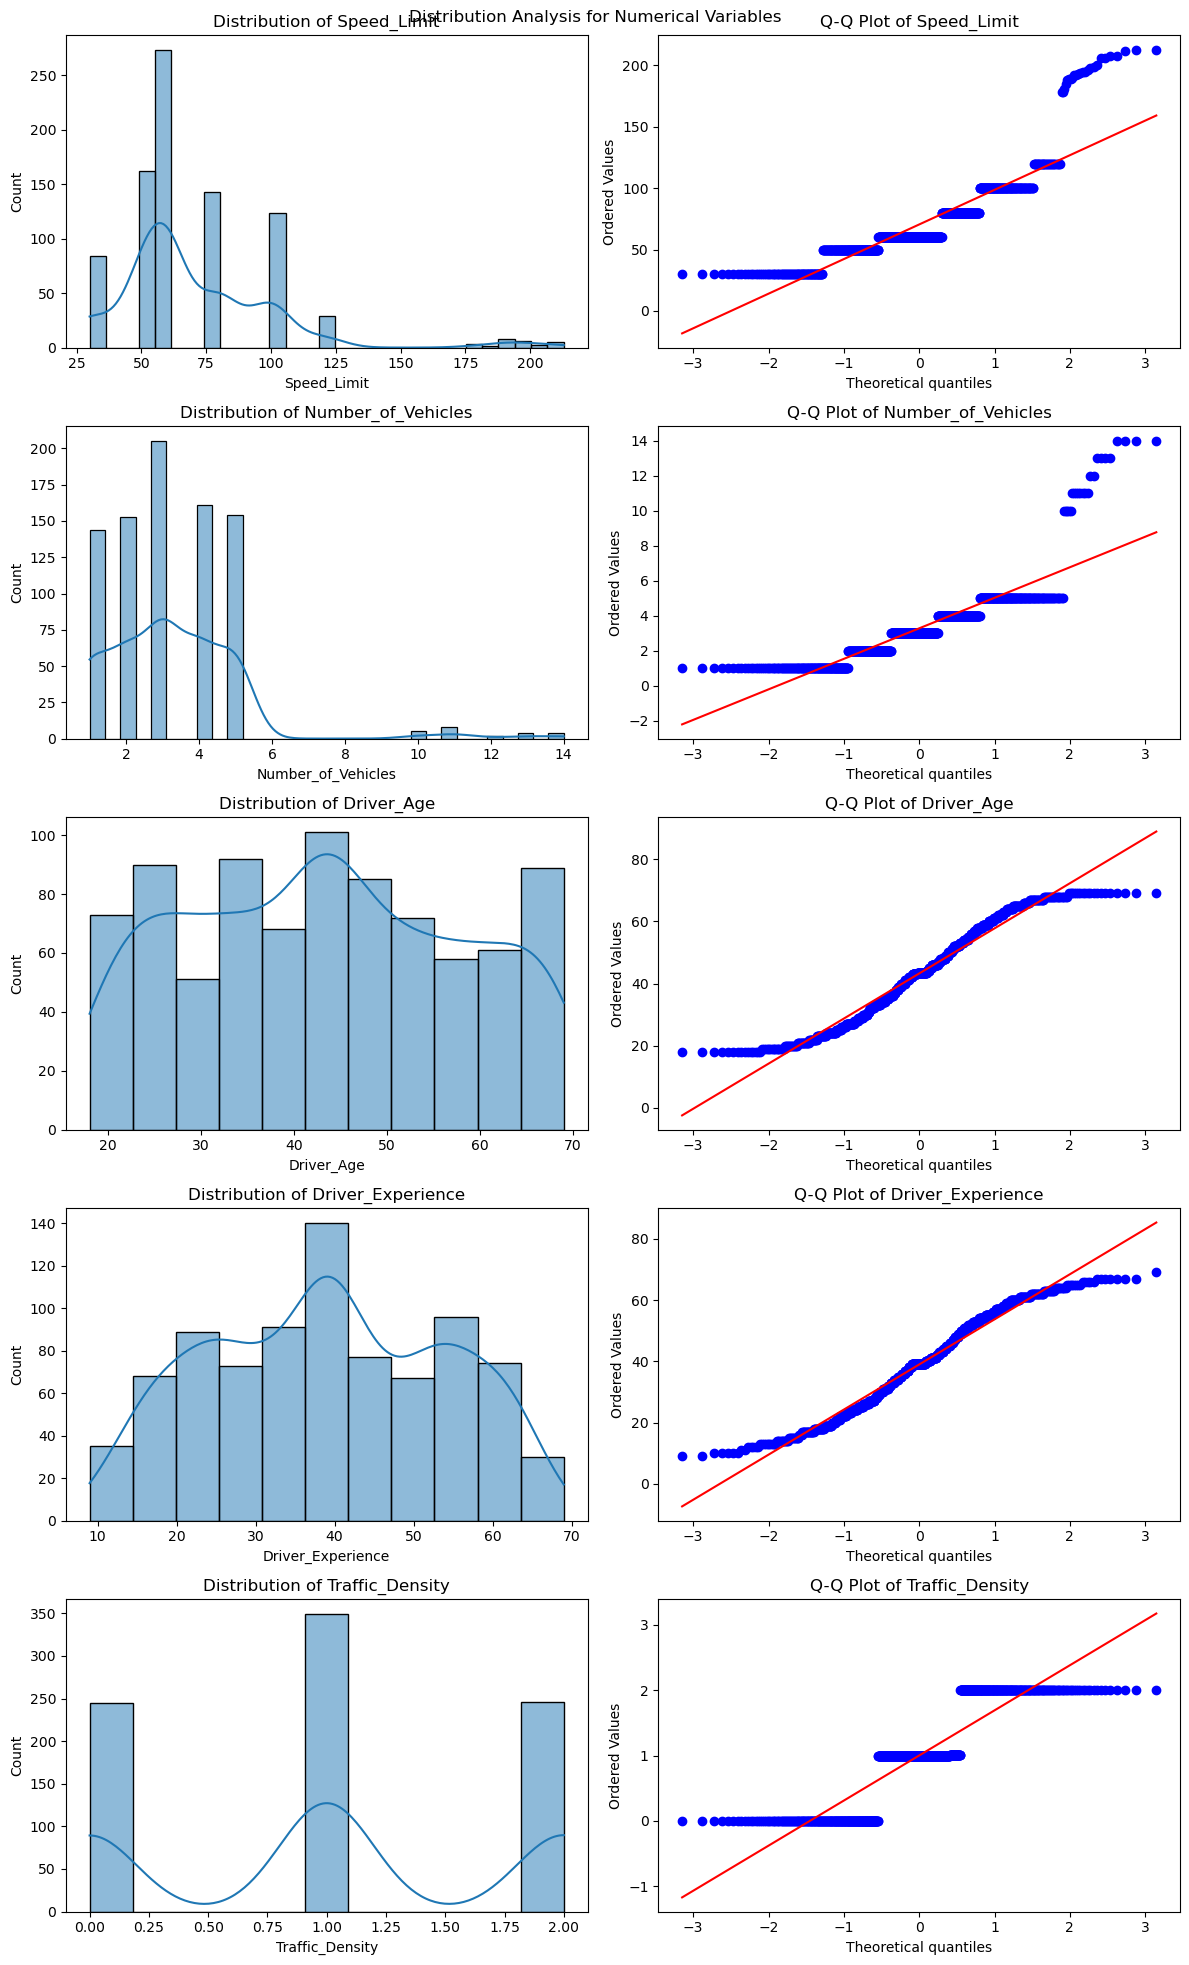

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numerical_cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience', 'Traffic_Density']

# Create subplots for distribution analysis
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 4*len(numerical_cols)))
fig.suptitle('Distribution Analysis for Numerical Variables')

for idx, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col}')
    
    # Q-Q plot
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

In [12]:
def impute_based_on_distribution(df, column):
    # Calculate skewness
    skewness = df[column].skew()
    
    # Print distribution information
    print(f"\n{column}:")
    print(f"Skewness: {skewness:.2f}")
    
    if abs(skewness) > 1:
        # Skewed distribution - use median
        print("→ Skewed distribution detected - Using MEDIAN imputation")
        return df[column].fillna(df[column].median())
    else:
        # Normal distribution - use mean
        print("→ Normal distribution detected - Using MEAN imputation")
        return df[column].fillna(df[column].mean())

# Apply imputation
for col in numerical_cols:
    df[col] = impute_based_on_distribution(df, col)


Speed_Limit:
Skewness: 1.85
→ Skewed distribution detected - Using MEDIAN imputation

Number_of_Vehicles:
Skewness: 2.13
→ Skewed distribution detected - Using MEDIAN imputation

Driver_Age:
Skewness: 0.06
→ Normal distribution detected - Using MEAN imputation

Driver_Experience:
Skewness: 0.01
→ Normal distribution detected - Using MEAN imputation

Traffic_Density:
Skewness: -0.00
→ Normal distribution detected - Using MEAN imputation


In [21]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    object 
 1   Road_Type             840 non-null    object 
 2   Time_of_Day           840 non-null    object 
 3   Traffic_Density       840 non-null    float64
 4   Speed_Limit           840 non-null    float64
 5   Number_of_Vehicles    840 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     840 non-null    object 
 8   Road_Condition        840 non-null    object 
 9   Vehicle_Type          840 non-null    object 
 10  Driver_Age            840 non-null    float64
 11  Driver_Experience     840 non-null    float64
 12  Road_Light_Condition  840 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


Weather                  0
Road_Type                0
Time_of_Day              0
Traffic_Density          0
Speed_Limit              0
Number_of_Vehicles       0
Driver_Alcohol          42
Accident_Severity        0
Road_Condition           0
Vehicle_Type             0
Driver_Age               0
Driver_Experience        0
Road_Light_Condition     0
Accident                42
dtype: int64

In [22]:
# 1. Handle Driver_Alcohol (Binary Column)
# Since it's a binary column (0/1), we'll fill with the most frequent value
df['Driver_Alcohol'] = df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].mode()[0])

# 2. Handle Accident (Target Variable)
# For the target variable, it's generally better to drop rows with missing values
df = df.dropna(subset=['Accident'])

# Verify the changes
print("Missing values after treatment:")
print(df.isnull().sum())

# Save the final cleaned dataset
df.to_csv('t:/ML_Prj/final_cleaned_traffic_data.csv', index=False)

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

Missing values after treatment:
Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Sev

Feature Engineering

In [23]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.000000,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.001253,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.000000,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.000000,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.000000,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [24]:
# Convert Time_of_Day to numerical values
time_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}
df['Time_Numeric'] = df['Time_of_Day'].map(time_mapping)

# Create time risk factor (higher risk during night and evening)
df['Time_Risk'] = df['Time_of_Day'].map({
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
})

In [25]:
# Create weather risk categories
weather_risk = {
    'Clear': 1,
    'Rainy': 2,
    'Foggy': 3,
    'Stormy': 4,
    'Snowy': 5
}
df['Weather_Risk'] = df['Weather'].map(weather_risk)

# Combined weather and road condition risk
df['Weather_Road_Risk'] = df.apply(lambda x: 
    2 if (x['Weather'] in ['Rainy', 'Snowy'] and x['Road_Condition'] == 'Wet') 
    else 3 if (x['Weather'] in ['Foggy', 'Stormy']) 
    else 1, axis=1)

In [26]:
# Create age groups
df['Age_Group'] = pd.cut(df['Driver_Age'], 
                        bins=[0, 25, 35, 50, 65, 100],
                        labels=['Young', 'Adult', 'Middle_Age', 'Senior', 'Elderly'])

# Experience to Age Ratio
df['Experience_Age_Ratio'] = df['Driver_Experience'] / df['Driver_Age']

# Risk Score based on age and experience
df['Driver_Risk_Score'] = df.apply(lambda x: 
    3 if (x['Driver_Age'] < 25 or x['Driver_Age'] > 65) 
    else 2 if (x['Driver_Experience'] < 5) 
    else 1, axis=1)

In [27]:
# Combined traffic risk
df['Traffic_Risk'] = df['Traffic_Density'] * df['Number_of_Vehicles']

# Speed vs Limit Risk
df['Speed_Risk'] = df['Speed_Limit'].apply(lambda x: 
    3 if x > 100 
    else 2 if x > 60 
    else 1)

# Road type risk
road_risk = {
    'Highway': 3,
    'City Road': 2,
    'Rural Road': 2,
    'Mountain Road': 4
}
df['Road_Type_Risk'] = df['Road_Type'].map(road_risk)

In [28]:
# Interaction between weather and time
df['Weather_Time_Interaction'] = df['Weather_Risk'] * df['Time_Risk']

# Traffic density and road type interaction
df['Traffic_Road_Interaction'] = df['Traffic_Density'] * df['Road_Type_Risk']

In [29]:
# Check new features
print("New features added:")
print(df.columns)

# Basic statistics of new numerical features
numerical_features = ['Time_Risk', 'Weather_Risk', 'Driver_Risk_Score', 
                     'Traffic_Risk', 'Speed_Risk', 'Experience_Age_Ratio']
print("\nNew features statistics:")
print(df[numerical_features].describe())

# Save engineered dataset
df.to_csv('t:/ML_Prj/traffic_data_engineered.csv', index=False)

New features added:
Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident', 'Time_Numeric', 'Time_Risk',
       'Weather_Risk', 'Weather_Road_Risk', 'Age_Group',
       'Experience_Age_Ratio', 'Driver_Risk_Score', 'Traffic_Risk',
       'Speed_Risk', 'Road_Type_Risk', 'Weather_Time_Interaction',
       'Traffic_Road_Interaction'],
      dtype='object')

New features statistics:
        Time_Risk  Weather_Risk  Driver_Risk_Score  Traffic_Risk  Speed_Risk  \
count  798.000000    798.000000         798.000000    798.000000  798.000000   
mean     2.280702      2.072682           1.438596      3.244582    1.446115   
std      0.961703      1.298481           0.828061      3.233657    0.612688   
min      1.000000      1.000000           1.000000      0.000000    1.000000   
25%     

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top features
X = df.select_dtypes(include=['float64', 'int64'])
y = df['Accident']

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("\nTop 10 important features:")
print(selected_features)


Top 10 important features:
['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Accident', 'Time_Numeric', 'Time_Risk', 'Driver_Risk_Score', 'Traffic_Risk', 'Speed_Risk', 'Road_Type_Risk']


In [32]:
from scipy.stats import chi2_contingency

Chi-square test results for categorical features:

Road_Type:
Chi-square statistic: 4.51
p-value: 0.2113


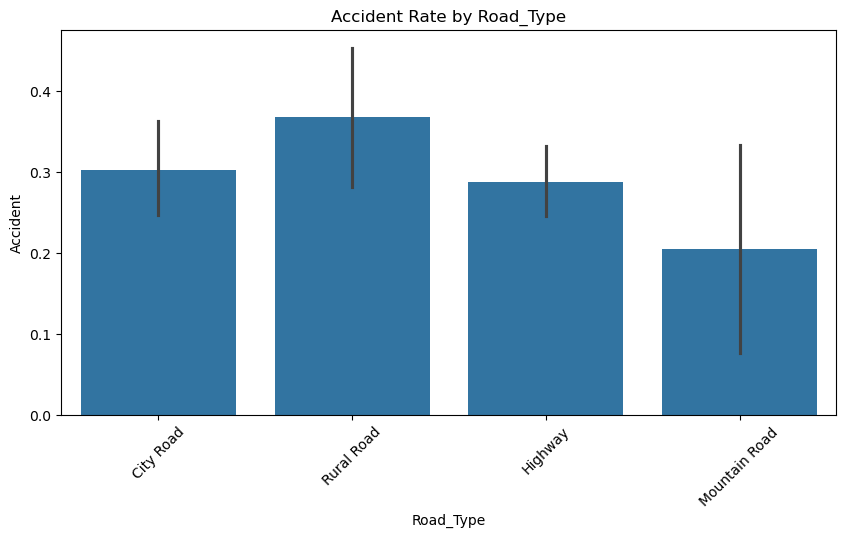


Road_Condition:
Chi-square statistic: 8.54
p-value: 0.0360


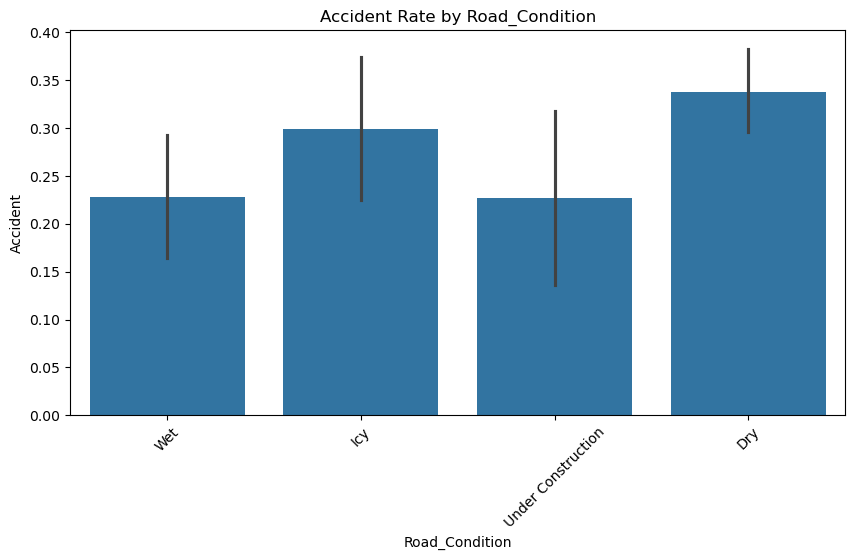


Accident_Severity:
Chi-square statistic: 0.96
p-value: 0.6180


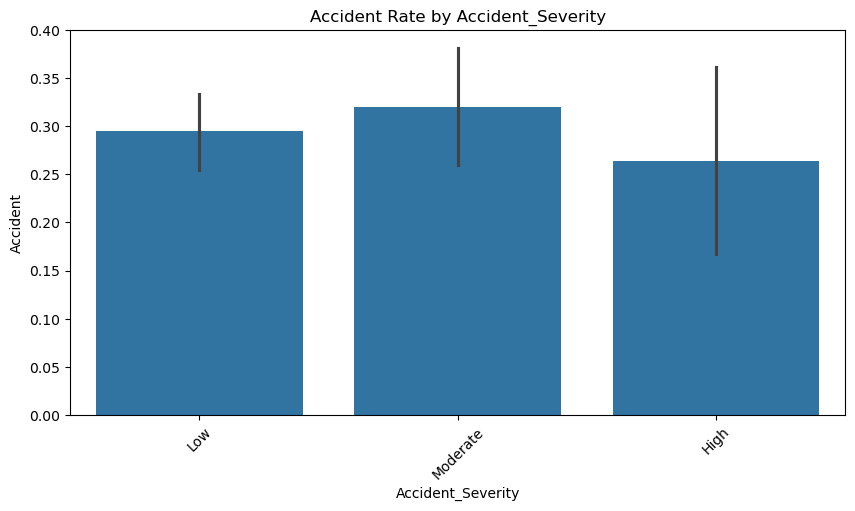


Top 15 important features (including encoded categorical):
['Speed_Limit', 'Number_of_Vehicles', 'Accident', 'Time_Numeric', 'Time_Risk', 'Driver_Risk_Score', 'Speed_Risk', 'Road_Type_Risk', 'Road_Type_Highway', 'Road_Type_Mountain Road', 'Road_Type_Rural Road', 'Road_Condition_Dry', 'Road_Condition_Under Construction', 'Road_Condition_Wet', 'Accident_Severity_Moderate']


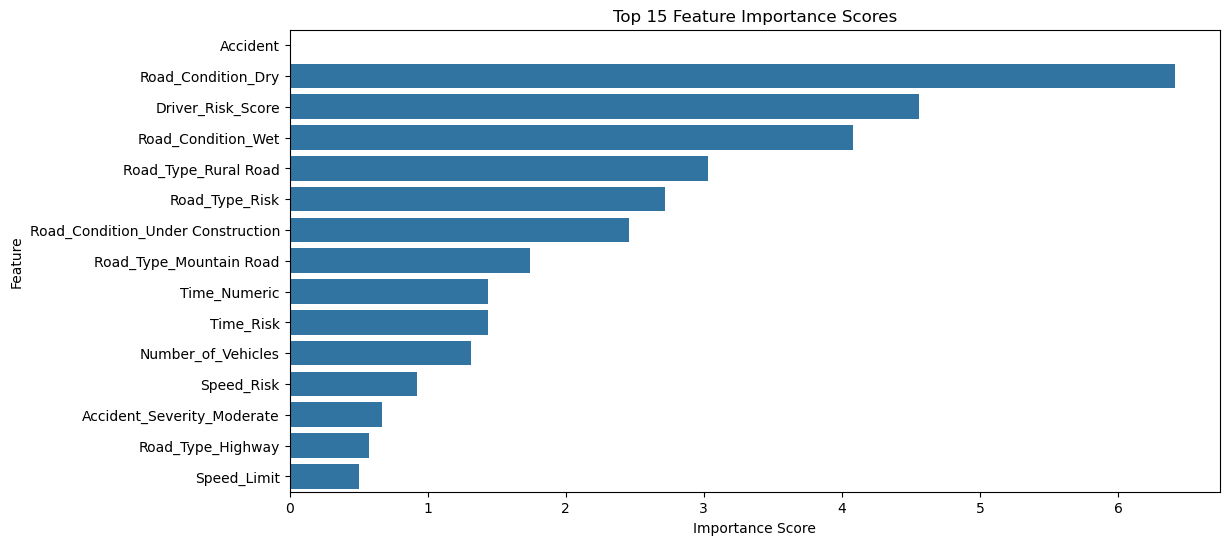

In [33]:
# Create contingency tables and calculate Chi-square statistics
categorical_features = ['Road_Type', 'Road_Condition', 'Accident_Severity']

print("Chi-square test results for categorical features:")
for feature in categorical_features:
    contingency = pd.crosstab(df[feature], df['Accident'])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\n{feature}:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    # Visualize relationship with accidents
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=feature, y='Accident')
    plt.title(f'Accident Rate by {feature}')
    plt.xticks(rotation=45)
    plt.show()

# 2. Create encoded versions of categorical features
categorical_encoded = pd.get_dummies(df[categorical_features], prefix=categorical_features)

# 3. Combine numerical and encoded categorical features
X_combined = pd.concat([X, categorical_encoded], axis=1)

# 4. Rerun feature selection with combined features
selector_combined = SelectKBest(score_func=f_classif, k=15)  # Increased to 15 features
X_selected_combined = selector_combined.fit_transform(X_combined, y)

# Get new selected feature names
selected_features_combined = X_combined.columns[selector_combined.get_support()].tolist()
print("\nTop 15 important features (including encoded categorical):")
print(selected_features_combined)

# 5. Create feature importance plot
importance_scores = selector_combined.scores_
feature_importance = pd.DataFrame({
    'Feature': X_combined.columns,
    'Importance Score': importance_scores
})
feature_importance = feature_importance.sort_values('Importance Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='Importance Score', y='Feature')
plt.title('Top 15 Feature Importance Scores')
plt.show()